# Task 4-4 Superdense Coding
### Sending 2 classical bits via a qubit

In [15]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer.backends.aer_simulator import AerSimulator

In [16]:
def quantum_circuit():
    quantum_register = QuantumRegister(2)
    classical_register_1 = ClassicalRegister(2)
    classical_register_2 = ClassicalRegister(2)
    quantum_circuit = QuantumCircuit(quantum_register,classical_register_1, classical_register_2)
    #Bringing to the bell state
    quantum_circuit.h(0)
    quantum_circuit.cx(0,1)

    with quantum_circuit.if_test((classical_register_1,1)):
        quantum_circuit.x(0)
    with quantum_circuit.if_test((classical_register_1,1)):
        quantum_circuit.z(0)
    
    quantum_circuit.cx(0,1)
    quantum_circuit.h(0)

    quantum_circuit.measure(0,classical_register_2[0])
    quantum_circuit.measure(1,classical_register_2[1])


    return quantum_circuit

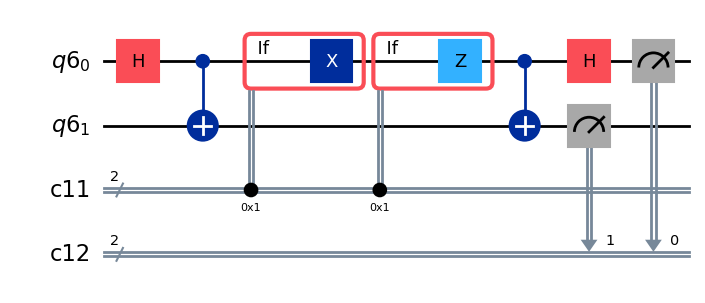

In [17]:
qc = quantum_circuit()
qc.draw("mpl")

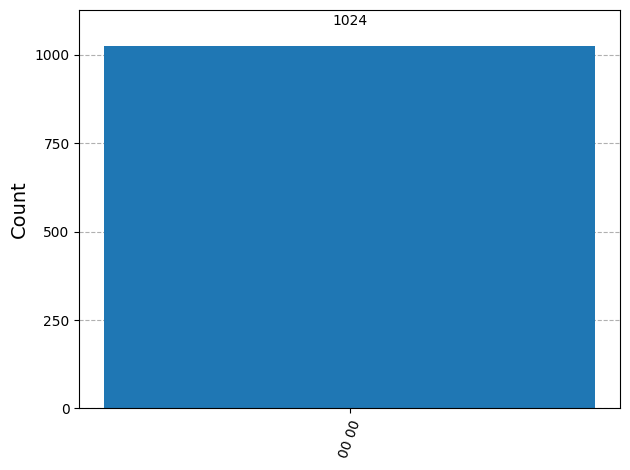

In [18]:
simulator = AerSimulator()
result = simulator.run(qc).result()
plot_histogram(result.get_counts(0))